# 1. NumPy 字节交换

In [2]:
'''在几乎所有的机器上，多字节对象都被存储为连续的字节序列。字节顺序，是跨越多字节的程序对象的存储规则。

大端模式：指数据的高字节保存在内存的低地址中，而数据的低字节保存在内存的高地址中，这样的存储模式有点儿类似于把数据当作字符串顺序处理：地址由小向大增加，而数据从高位往低位放；这和我们的阅读习惯一致。

小端模式：指数据的高字节保存在内存的高地址中，而数据的低字节保存在内存的低地址中，这种存储模式将地址的高低和数据位权有效地结合起来，高地址部分权值高，低地址部分权值低

numpy.ndarray.byteswap() 函数将 ndarray 中每个元素中的字节进行大小端转换
'''
import numpy as np 
a = np.array([1,  256,  8755], dtype = np.int16)  
print ('我们的数组是：')
print (a)
print ('以十六进制表示内存中的数据：')
print (map(hex,a))
# byteswap() 函数通过传入 true 来原地交换 
print ('调用 byteswap() 函数：')
print (a.byteswap(True))
print ('十六进制形式：')
print (map(hex,a))
# 我们可以看到字节已经交换了

我们的数组是：
[   1  256 8755]
以十六进制表示内存中的数据：
调用 byteswap() 函数：
[  256     1 13090]
十六进制形式：


# 2 NumPy 副本和视图

In [3]:
'''
副本是一个数据的完整的拷贝，如果我们对副本进行修改，它不会影响到原始数据，物理内存不在同一位置。

视图是数据的一个别称或引用，通过该别称或引用亦便可访问、操作原有数据，但原有数据不会产生拷贝。如果我们对视图进行修改，它会影响到原始数据，物理内存在同一位置。

视图一般发生在：

1、numpy 的切片操作返回原数据的视图。
2、调用 ndarray 的 view() 函数产生一个视图。
副本一般发生在：

Python 序列的切片操作，调用deepCopy()函数。
调用 ndarray 的 copy() 函数产生一个副本。
无复制
简单的赋值不会创建数组对象的副本。 相反，它使用原始数组的相同id()来访问它。 id()返回 Python 对象的通用标识符，类似于 C 中的指针。

此外，一个数组的任何变化都反映在另一个数组上。 例如，一个数组的形状改变也会改变另一个数组的形状
'''
a = np.arange(6)  
print ('我们的数组是：')
print (a)
print ('调用 id() 函数：')
print (id(a))
print ('a 赋值给 b：')
b = a 
print (b)
print ('b 拥有相同 id()：')
print (id(b))
print ('修改 b 的形状：')
b.shape =  3,2  
print (b)
print ('a 的形状也修改了：')
print (a)

我们的数组是：
[0 1 2 3 4 5]
调用 id() 函数：
2355512481632
a 赋值给 b：
[0 1 2 3 4 5]
b 拥有相同 id()：
2355512481632
修改 b 的形状：
[[0 1]
 [2 3]
 [4 5]]
a 的形状也修改了：
[[0 1]
 [2 3]
 [4 5]]


In [4]:
'''ndarray.view() 方会创建一个新的数组对象，该方法创建的新数组的维数更改不会更改原始数据的维数'''
# 最开始 a 是个 3X2 的数组
a = np.arange(6).reshape(3,2)  
print ('数组 a：')
print (a)
print ('创建 a 的视图：')
b = a.view()  
print (b)
print ('两个数组的 id() 不同：')
print ('a 的 id()：')
print (id(a))
print ('b 的 id()：' )
print (id(b))
# 修改 b 的形状，并不会修改 a
b.shape =  2,3
print ('b 的形状：')
print (b)
print ('a 的形状：')
print (a)

数组 a：
[[0 1]
 [2 3]
 [4 5]]
创建 a 的视图：
[[0 1]
 [2 3]
 [4 5]]
两个数组的 id() 不同：
a 的 id()：
2355512482192
b 的 id()：
2355512482352
b 的形状：
[[0 1 2]
 [3 4 5]]
a 的形状：
[[0 1]
 [2 3]
 [4 5]]


In [5]:
'''使用切片创建视图修改数据会影响到原始数组

变量 a,b 都是 arr 的一部分视图，对视图的修改会直接反映到原数据中。
但是我们观察 a,b 的 id，他们是不同的，也就是说，视图虽然指向原数据，但是他们和赋值引用还是有区别的
'''
arr = np.arange(12)
print ('我们的数组：')
print (arr)
print ('创建切片：')
a=arr[3:]
b=arr[3:]
a[1]=123
b[2]=234
print(arr)
print(id(a),id(b),id(arr[3:]))

我们的数组：
[ 0  1  2  3  4  5  6  7  8  9 10 11]
创建切片：
[  0   1   2   3 123 234   6   7   8   9  10  11]
2355256085680 2355512482192 2355256085600


In [6]:
'''ndarray.copy() 函数创建一个副本。 对副本数据进行修改，不会影响到原始数据，它们物理内存不在同一位置'''
a = np.array([[10,10],  [2,3],  [4,5]])  
print ('数组 a：')
print (a)
print ('创建 a 的深层副本：')
b = a.copy()  
print ('数组 b：')
print (b)
# b 与 a 不共享任何内容  
print ('我们能够写入 b 来写入 a 吗？')
print (b is a)
print ('修改 b 的内容：')
b[0,0]  =  100  
print ('修改后的数组 b：')
print (b)
print ('a 保持不变：')
print (a)

数组 a：
[[10 10]
 [ 2  3]
 [ 4  5]]
创建 a 的深层副本：
数组 b：
[[10 10]
 [ 2  3]
 [ 4  5]]
我们能够写入 b 来写入 a 吗？
False
修改 b 的内容：
修改后的数组 b：
[[100  10]
 [  2   3]
 [  4   5]]
a 保持不变：
[[10 10]
 [ 2  3]
 [ 4  5]]


# 3 NumPy 矩阵库(Matrix)

In [7]:
'''
NumPy 中包含了一个矩阵库 numpy.matlib，该模块中的函数返回的是一个矩阵，而不是 ndarray 对象。

一个 的矩阵是一个由行（row）列（column）元素排列成的矩形阵列。

矩阵里的元素可以是数字、符号或数学式。
matlib.empty()
matlib.empty() 函数返回一个新的矩阵，语法格式为：

numpy.matlib.empty(shape, dtype, order)
参数说明：

shape: 定义新矩阵形状的整数或整数元组
Dtype: 可选，数据类型
order: C（行序优先） 或者 F（列序优先）

'''
import numpy.matlib
print (np.matlib.empty((2,2)))
# 填充为随机数据

[[5.e-324 4.e-323]
 [4.e-323 4.e-323]]


In [8]:
'''numpy.matlib.zeros() 函数创建一个以 0 填充的矩阵'''
print (np.matlib.zeros((2,2)))

[[0. 0.]
 [0. 0.]]


In [9]:
print (np.matlib.ones((2,2)))

[[1. 1.]
 [1. 1.]]


In [10]:
'''numpy.matlib.eye() 函数返回一个矩阵，对角线元素为 1，其他位置为零。

numpy.matlib.eye(n, M,k, dtype)
参数说明：

n: 返回矩阵的行数
M: 返回矩阵的列数，默认为 n
k: 对角线的索引
dtype: 数据类型'''
print (np.matlib.eye(n =  3, M =  4, k =  0, dtype =  float))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [11]:
'''numpy.matlib.identity() 函数返回给定大小的单位矩阵。

单位矩阵是个方阵，从左上角到右下角的对角线（称为主对角线）上的元素均为 1，除此以外全都为 0'''
# 大小为 5，类型位浮点型
print (np.matlib.identity(5, dtype =  float))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [12]:
'''numpy.matlib.rand() 函数创建一个给定大小的矩阵，数据是随机填充的'''
print (np.matlib.rand(3,3))

[[0.27858482 0.15051876 0.89171042]
 [0.39260824 0.94696296 0.07582564]
 [0.08782124 0.67007906 0.28274796]]


In [13]:
'''矩阵总是二维的，而 ndarray 是一个 n 维数组。 两个对象都是可互换的'''
i = np.matrix('1,2;3,4')  
print (i)

[[1 2]
 [3 4]]


In [14]:
j = np.asarray(i)  
print (j)

[[1 2]
 [3 4]]


In [15]:
k = np.asmatrix (j)  
print (k)

[[1 2]
 [3 4]]


# 4 NumPy 线性代数

In [17]:
'''NumPy 提供了线性代数函数库 linalg，该库包含了线性代数所需的所有功能，可以看看下面的说明：

函数	描述
dot	两个数组的点积，即元素对应相乘。
vdot	两个向量的点积
inner	两个数组的内积
matmul	两个数组的矩阵积
determinant	数组的行列式
solve	求解线性矩阵方程
inv	计算矩阵的乘法逆矩阵
numpy.dot()
numpy.dot() 对于两个一维的数组，计算的是这两个数组对应下标元素的乘积和(数学上称之为内积)；
对于二维数组，计算的是两个数组的矩阵乘积；对于多维数组，它的通用计算公式如下，
即结果数组中的每个元素都是：数组a的最后一维上的所有元素与数组b的倒数第二位上的所有元素的乘积和：
dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])'''
a = np.array([[1,2],[3,4]])
b = np.array([[11,12],[13,14]])
print(np.dot(a,b))

[[37 40]
 [85 92]]


In [18]:
'''numpy.vdot() 函数是两个向量的点积。 如果第一个参数是复数，那么它的共轭复数会用于计算。 如果参数是多维数组，它会被展开。'''
a = np.array([[1,2],[3,4]]) 
b = np.array([[11,12],[13,14]]) 
 
# vdot 将数组展开计算内积
print (np.vdot(a,b))

130


In [19]:
'''numpy.inner() 函数返回一维数组的向量内积。对于更高的维度，它返回最后一个轴上的和的乘积'''
print (np.inner(np.array([1,2,3]),np.array([0,1,0])))
# 等价于 1*0+2*1+3*0

2


In [20]:
# 多维数组实例
a = np.array([[1,2], [3,4]]) 
 
print ('数组 a：')
print (a)
b = np.array([[11, 12], [13, 14]]) 
 
print ('数组 b：')
print (b)
 
print ('内积：')
print (np.inner(a,b))

数组 a：
[[1 2]
 [3 4]]
数组 b：
[[11 12]
 [13 14]]
内积：
[[35 41]
 [81 95]]


In [21]:
'''numpy.matmul 函数返回两个数组的矩阵乘积。 虽然它返回二维数组的正常乘积，但如果任一参数的维数大于2，则将其视为存在于最后两个索引的矩阵的栈，并进行相应广播。

另一方面，如果任一参数是一维数组，则通过在其维度上附加 1 来将其提升为矩阵，并在乘法之后被去除。

对于二维数组，它就是矩阵乘法'''
a = [[1,0],[0,1]] 
b = [[4,1],[2,2]] 
print (np.matmul(a,b))

[[4 1]
 [2 2]]


In [22]:
a = [[1,0],[0,1]] 
b = [1,2] 
print (np.matmul(a,b))
print (np.matmul(b,a))

[1 2]
[1 2]


In [23]:
a = np.arange(8).reshape(2,2,2) 
b = np.arange(4).reshape(2,2) 
print (np.matmul(a,b))

[[[ 2  3]
  [ 6 11]]

 [[10 19]
  [14 27]]]


In [24]:
'''numpy.linalg.det() 函数计算输入矩阵的行列式。

行列式在线性代数中是非常有用的值。 它从方阵的对角元素计算。 对于 2×2 矩阵，它是左上和右下元素的乘积与其他两个的乘积的差。

换句话说，对于矩阵[[a，b]，[c，d]]，行列式计算为 ad-bc。 较大的方阵被认为是 2×2 矩阵的组合'''
a = np.array([[1,2], [3,4]]) 
 
print (np.linalg.det(a))

-2.0000000000000004


In [25]:
b = np.array([[6,1,1], [4, -2, 5], [2,8,7]]) 
print (b)
print (np.linalg.det(b))
print (6*(-2*7 - 5*8) - 1*(4*7 - 5*2) + 1*(4*8 - -2*2))

[[ 6  1  1]
 [ 4 -2  5]
 [ 2  8  7]]
-306.0
-306


In [26]:
'''numpy.linalg.solve() 函数给出了矩阵形式的线性方程的解'''

'numpy.linalg.solve() 函数给出了矩阵形式的线性方程的解'

In [27]:
'''numpy.linalg.inv() 函数计算矩阵的乘法逆矩阵。

逆矩阵（inverse matrix）：设A是数域上的一个n阶矩阵，若在相同数域上存在另一个n阶矩阵B，
使得： AB=BA=E ，则我们称B是A的逆矩阵，而A则被称为可逆矩阵。注：E为单位矩阵'''
x = np.array([[1,2],[3,4]]) 
y = np.linalg.inv(x) 
print (x)
print (y)
print (np.dot(x,y))

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In [28]:
a = np.array([[1,1,1],[0,2,5],[2,5,-1]]) 
 
print ('数组 a：')
print (a)
ainv = np.linalg.inv(a) 
 
print ('a 的逆：')
print (ainv)
 
print ('矩阵 b：')
b = np.array([[6],[-4],[27]]) 
print (b)
 
print ('计算：A^(-1)B：')
x = np.linalg.solve(a,b) 
print (x)
# 这就是线性方向 x = 5, y = 3, z = -2 的解

数组 a：
[[ 1  1  1]
 [ 0  2  5]
 [ 2  5 -1]]
a 的逆：
[[ 1.28571429 -0.28571429 -0.14285714]
 [-0.47619048  0.14285714  0.23809524]
 [ 0.19047619  0.14285714 -0.0952381 ]]
矩阵 b：
[[ 6]
 [-4]
 [27]]
计算：A^(-1)B：
[[ 5.]
 [ 3.]
 [-2.]]


In [30]:
# 结果
x = np.dot(ainv,b)
x

array([[ 5.],
       [ 3.],
       [-2.]])

# 5 NumPy IO

In [31]:
'''Numpy 可以读写磁盘上的文本数据或二进制数据。

NumPy 为 ndarray 对象引入了一个简单的文件格式：npy。

npy 文件用于存储重建 ndarray 所需的数据、图形、dtype 和其他信息。

常用的 IO 函数有：

load() 和 save() 函数是读写文件数组数据的两个主要函数，默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为 .npy 的文件中。
savze() 函数用于将多个数组写入文件，默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为 .npz 的文件中。
loadtxt() 和 savetxt() 函数处理正常的文本文件(.txt 等)

numpy.save() 函数将数组保存到以 .npy 为扩展名的文件中。

numpy.save(file, arr, allow_pickle=True, fix_imports=True)
参数说明：

file：要保存的文件，扩展名为 .npy，如果文件路径末尾没有扩展名 .npy，该扩展名会被自动加上。
arr: 要保存的数组
allow_pickle: 可选，布尔值，允许使用 Python pickles 保存对象数组，Python 中的 pickle 用于在保存到磁盘文件或从磁盘文件读取之前，对对象进行序列化和反序列化。
fix_imports: 可选，为了方便 Pyhton2 中读取 Python3 保存的数据
'''
a = np.array([1,2,3,4,5]) 
 
# 保存到 outfile.npy 文件上
np.save('outfile.npy',a) 
 
# 保存到 outfile2.npy 文件上，如果文件路径末尾没有扩展名 .npy，该扩展名会被自动加上
np.save('outfile2',a)

In [32]:
b = np.load('outfile.npy')  
print (b)

[1 2 3 4 5]


In [33]:
'''numpy.savez() 函数将多个数组保存到以 npz 为扩展名的文件中。

numpy.savez(file, *args, **kwds)
参数说明：

file：要保存的文件，扩展名为 .npz，如果文件路径末尾没有扩展名 .npz，该扩展名会被自动加上。
args: 要保存的数组，可以使用关键字参数为数组起一个名字，非关键字参数传递的数组会自动起名为 arr_0, arr_1, …　。
kwds: 要保存的数组使用关键字名称'''
a = np.array([[1,2,3],[4,5,6]])
b = np.arange(0, 1.0, 0.1)
c = np.sin(b)
# c 使用了关键字参数 sin_array
np.savez("runoob.npz", a, b, sin_array = c)
r = np.load("runoob.npz")  
print(r.files) # 查看各个数组名称
print(r["arr_0"]) # 数组 a
print(r["arr_1"]) # 数组 b
print(r["sin_array"]) # 数组 c

['sin_array', 'arr_0', 'arr_1']
[[1 2 3]
 [4 5 6]]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691]


In [34]:
'''savetxt() 函数是以简单的文本文件格式存储数据，对应的使用 loadtxt() 函数来获取数据。

np.loadtxt(FILENAME, dtype=int, delimiter=' ')
np.savetxt(FILENAME, a, fmt="%d", delimiter=",")
参数 delimiter 可以指定各种分隔符、针对特定列的转换器函数、需要跳过的行数等'''
a = np.array([1,2,3,4,5]) 
np.savetxt('out.txt',a) 
b = np.loadtxt('out.txt')  
 
print(b)

[1. 2. 3. 4. 5.]


In [35]:
a=np.arange(0,10,0.5).reshape(4,-1)
np.savetxt("out.txt",a,fmt="%d",delimiter=",") # 改为保存为整数，以逗号分隔
b = np.loadtxt("out.txt",delimiter=",") # load 时也要指定为逗号分隔
print(b)

[[0. 0. 1. 1. 2.]
 [2. 3. 3. 4. 4.]
 [5. 5. 6. 6. 7.]
 [7. 8. 8. 9. 9.]]


# 6 NumPy Matplotlib

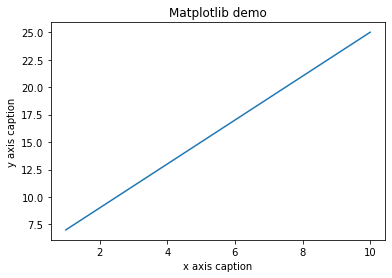

In [38]:
'''Matplotlib 是 Python 的绘图库。 它可与 NumPy 一起使用，提供了一种有效的 MatLab 开源替代方案。
它也可以和图形工具包一起使用，如 PyQt 和 wxPython'''
from matplotlib import pyplot as plt 
%matplotlib inline 
x = np.arange(1,11) 
y =  2  * x +  5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()

In [44]:
'''Matplotlib 默认情况不支持中文，我们可以使用以下简单的方法来解决：

首先下载字体（注意系统）：https://www.fontpalace.com/font-details/SimHei/

SimHei.ttf 文件放在当前执行的代码文件中
fname 为 你下载的字体库路径，注意 SimHei.ttf 字体的路径
'''
zhfont1 = matplotlib.font_manager.FontProperties(fname="SimHei.ttf") 
 
x = np.arange(1,11) 
y =  2  * x +  5 
plt.title("易水行numpy教程 - 测试", fontproperties=zhfont1) 
 
# fontproperties 设置中文显示，fontsize 设置字体大小
plt.xlabel("x 轴", fontproperties=zhfont1)
plt.ylabel("y 轴", fontproperties=zhfont1)
plt.plot(x,y) 
plt.show()

NameError: name 'matplotlib' is not defined

In [45]:
import matplotlib
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

for i in a:
    print(i)

Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial Unicode MS
Bahnschrift
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookshelf Symbol 7
Calibri
Calibri
Calibri
Calibri
Calibri
Calibri
Cambria
Cambria
Cambria
Cambria
Candara
Candara
Candara
Candara
Century
Century Gothic
Century Gothic
Century Gothic
Century Gothic
Comic Sans MS
Comic Sans MS
Comic Sans MS
Comic Sans MS
Consolas
Consolas
Consolas
Consolas
Constantia
Constantia
Constantia
Constantia
Corbel
Corbel
Corbel
Corbel
Courier New
Courier New
Courier New
Courier New
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
DengXian
DengXian
DengXian
Dubai
Dubai
Dubai
Dubai
Ebrima
Ebrima
FZShuTi
FZYaoTi
FangSong
Franklin Gothic Medium
Franklin Gothic Medium
Gabriola
Gadugi
Gadugi
Garamond
Garam

In [46]:
plt.rcParams['font.family']=['STFangsong']

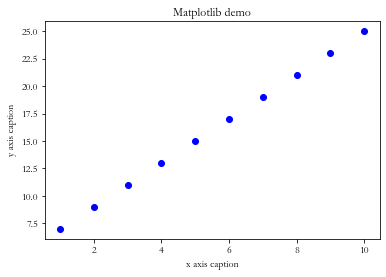

In [47]:
'''
作为线性图的替代，可以通过向 plot() 函数添加格式字符串来显示离散值。 可以使用以下格式化字符。

字符	描述
'-'	实线样式
'--'	短横线样式
'-.'	点划线样式
':'	虚线样式
'.'	点标记
','	像素标记
'o'	圆标记
'v'	倒三角标记
'^'	正三角标记
'&lt;'	左三角标记
'&gt;'	右三角标记
'1'	下箭头标记
'2'	上箭头标记
'3'	左箭头标记
'4'	右箭头标记
's'	正方形标记
'p'	五边形标记
'*'	星形标记
'h'	六边形标记 1
'H'	六边形标记 2
'+'	加号标记
'x'	X 标记
'D'	菱形标记
'd'	窄菱形标记
'&#124;'	竖直线标记
'_'	水平线标记
以下是颜色的缩写：

字符	颜色
'b'	蓝色
'g'	绿色
'r'	红色
'c'	青色
'm'	品红色
'y'	黄色
'k'	黑色
'w'	白色
要显示圆来代表点，而不是上面示例中的线，请使用 ob 作为 plot() 函数中的格式字符串。
'''
x = np.arange(1,11) 
y =  2  * x +  5 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y,"ob") 
plt.show()

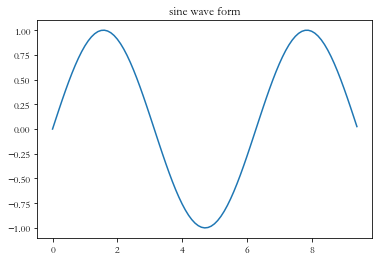

In [48]:
'''使用 matplotlib 生成正弦波图'''
# 计算正弦曲线上点的 x 和 y 坐标
x = np.arange(0,  3  * np.pi,  0.1) 
y = np.sin(x)
plt.title("sine wave form")  
# 使用 matplotlib 来绘制点
plt.plot(x, y) 
plt.show()

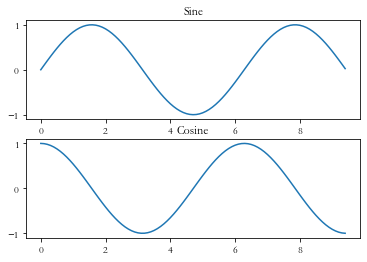

In [49]:
'''subplot() 函数允许你在同一图中绘制不同的东西。

以下实例绘制正弦和余弦值'''
# 计算正弦和余弦曲线上的点的 x 和 y 坐标 
x = np.arange(0,  3  * np.pi,  0.1) 
y_sin = np.sin(x) 
y_cos = np.cos(x)  
# 建立 subplot 网格，高为 2，宽为 1  
# 激活第一个 subplot
plt.subplot(2,  1,  1)  
# 绘制第一个图像 
plt.plot(x, y_sin) 
plt.title('Sine')  
# 将第二个 subplot 激活，并绘制第二个图像
plt.subplot(2,  1,  2) 
plt.plot(x, y_cos) 
plt.title('Cosine')  
# 展示图像
plt.show()

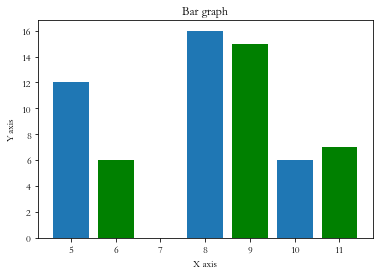

In [50]:
'''pyplot 子模块提供 bar() 函数来生成条形图。

以下实例生成两组 x 和 y 数组的条形图'''

x =  [5,8,10] 
y =  [12,16,6] 
x2 =  [6,9,11] 
y2 =  [6,15,7] 
plt.bar(x, y, align =  'center') 
plt.bar(x2, y2, color =  'g', align =  'center') 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis') 
plt.show()

In [51]:
'''numpy.histogram() 函数是数据的频率分布的图形表示。 水平尺寸相等的矩形对应于类间隔，称为 bin，变量 height 对应于频率。

numpy.histogram()函数将输入数组和 bin 作为两个参数。 bin 数组中的连续元素用作每个 bin 的边界'''


a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
np.histogram(a,bins =  [0,20,40,60,80,100]) 
hist,bins = np.histogram(a,bins =  [0,20,40,60,80,100])  
print (hist) 
print (bins)

[3 4 5 2 1]
[  0  20  40  60  80 100]


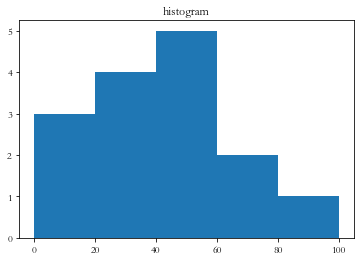

In [52]:
'''Matplotlib 可以将直方图的数字表示转换为图形。 pyplot 子模块的 plt() 函数将包含数据和 bin 数组的数组作为参数，并转换为直方图。'''
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]) 
plt.hist(a, bins =  [0,20,40,60,80,100]) 
plt.title("histogram") 
plt.show()